# Flash crash: what was special?

In [16]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [17]:
events=pd.read_parquet("data/clean/SPY.P_2010.parquet")
events

,index,bid,ask,trade.price,trade.volume
0,2010-01-04 09:30:00.001000-05:00,112.36,112.37,112.36,400.0
1,2010-01-04 09:30:00.189000-05:00,112.36,112.38,112.37,100.0
2,2010-01-04 09:30:00.190999-05:00,112.36,112.38,112.37,400.0
3,2010-01-04 09:30:00.294999-05:00,112.36,112.38,112.37,2300.0
4,2010-01-04 09:30:00.296000-05:00,112.36,112.38,112.37,300.0
...,...,...,...,...,...
8396566,2010-12-31 15:59:59.554999-05:00,125.78,125.79,125.78,1400.0
8396567,2010-12-31 15:59:59.654000-05:00,125.77,125.78,125.77,1600.0
8396568,2010-12-31 15:59:59.727999-05:00,125.77,125.78,125.77,100.0
8396569,2010-12-31 15:59:59.757000-05:00,125.77,125.78,125.77,766.0


In [18]:
events.set_index("index",inplace=True)

In [19]:
events["mid"]=(events.bid+events.ask)*0.5
events["s"]=np.sign(events["trade.price"]-events["mid"])

In [20]:
date05=pd.Timestamp(2010,5,5)
date06=pd.Timestamp(2010,5,6)
date07=pd.Timestamp(2010,5,7)


In [21]:
events_05=events[events.index.date==date05.date()]
events_06=events[events.index.date==date06.date()]
events_07=events[events.index.date==date07.date()]

In [22]:
def compute_R(events,tau_max=1000,dtau=1):
    taus=range(1,tau_max,dtau)
    R=[]
    R_plus=[]
    R_minus=[]
    for tau in taus:
        events_mid_shifted=events["mid"].shift(-tau)
        R.append(np.nanmean(events["s"]*(events_mid_shifted-events["mid"])))
    return np.array(R)   
    
    return np.array(R)

In [ ]:
R_05=compute_R(events_05)
R_06=compute_R(events_06)
R_07=compute_R(events_07)

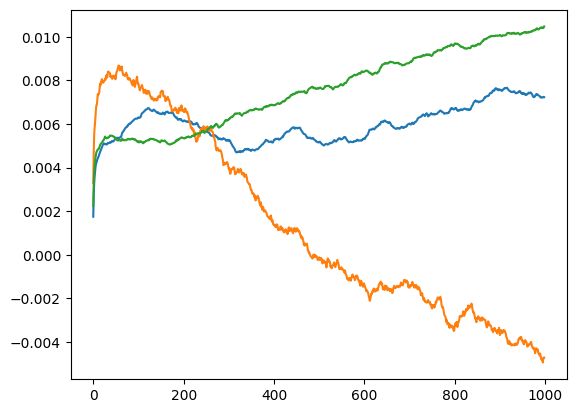

In [27]:
plt.plot(R_05,label="05")
plt.plot(R_06,label="06")
plt.plot(R_07,label="07")
plt.show()

In [28]:
R_05_hour=events_05[["s","mid"]].groupby(events_05.index.hour).apply(compute_R)
R_06_hour=events_06[["s","mid"]].groupby(events_06.index.hour).apply(compute_R)
R_07_hour=events_07[["s","mid"]].groupby(events_07.index.hour).apply(compute_R)

<AxesSubplot: >

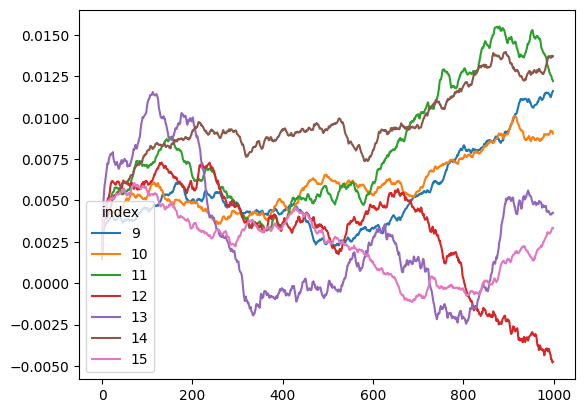

In [29]:
pd.pivot_table(R_05_hour.apply(pd.Series),columns=R_05_hour.index).plot()

<AxesSubplot: >

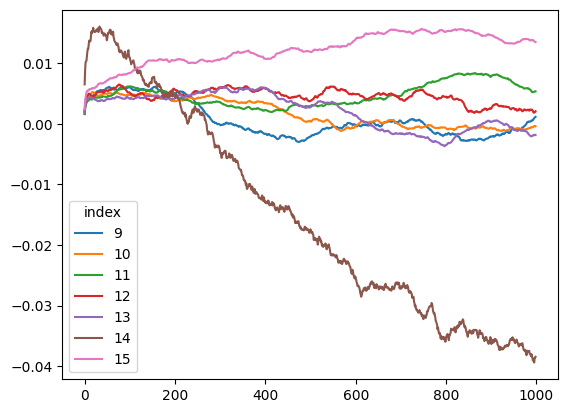

In [30]:
pd.pivot_table(R_06_hour.apply(pd.Series),columns=R_05_hour.index).plot()

<AxesSubplot: >

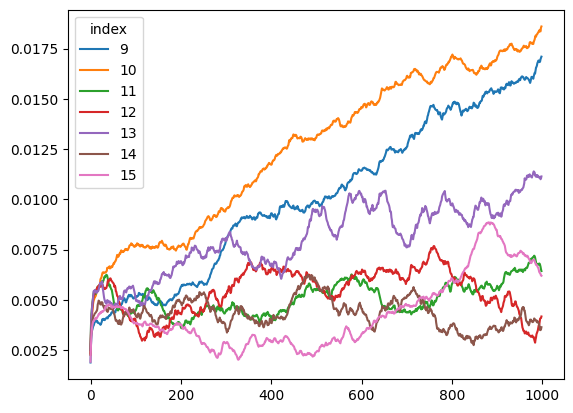

In [31]:
pd.pivot_table(R_07_hour.apply(pd.Series),columns=R_05_hour.index).plot()